In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
tweets = pd.read_csv('tweets_clean.csv')
predictions = pd.read_csv('image_prediction_clean.csv')
predictions_result = pd.read_csv('prediction_results.csv')

In [18]:
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,classification,favorits_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,NaN,38830.0,8595.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,NaN,33263.0,6316.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,NaN,25059.0,4192.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,NaN,42207.0,8707.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,NaN,40358.0,9481.0


In [19]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,rating,favorits_count,retweet_count
count,1.994000e+03,2.300000e+01,2.300000e+01,1994.000000,1994.000000,1994.000000,1993.000000,1993.000000
mean,7.358508e+17,6.978112e+17,4.196984e+09,12.280843,10.532096,1.169249,8859.282489,2719.871049
std,6.747816e+16,4.359384e+16,0.000000e+00,41.497718,7.320710,4.067071,12577.929297,4696.503547
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,2.000000,0.000000,79.000000,13.000000
25%,6.758475e+17,6.732411e+17,4.196984e+09,10.000000,10.000000,1.000000,1921.000000,608.000000
50%,7.084748e+17,6.757073e+17,4.196984e+09,11.000000,10.000000,1.100000,4053.000000,1310.000000
75%,7.877873e+17,7.031489e+17,4.196984e+09,12.000000,10.000000,1.200000,11159.000000,3126.000000
max,8.924206e+17,8.558181e+17,4.196984e+09,1776.000000,170.000000,177.600000,143495.000000,77416.000000


In [20]:
predictions.head()

,tweet_id,jpg_url,img_num
0,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2


In [21]:
predictions_result.head()

,tweet_id,race_prediction,confidence,race,prediction
0,892420643555336193,orange,0.097049,False,1
1,892177421306343426,Chihuahua,0.323581,True,1
2,891815181378084864,Chihuahua,0.716012,True,1
3,891689557279858688,paper_towel,0.170278,False,1
4,891327558926688256,basset,0.555712,True,1


In [22]:
predictions_result.describe()

,tweet_id,confidence,prediction
count,5.982000e+03,5.982000e+03,5982.000000
mean,7.358508e+17,2.628696e-01,2.000000
std,6.746688e+16,2.908879e-01,0.816565
min,6.660209e+17,1.740170e-10,1.000000
25%,6.758457e+17,5.126900e-02,1.000000
50%,7.084748e+17,1.347995e-01,2.000000
75%,7.878106e+17,3.792875e-01,3.000000
max,8.924206e+17,1.000000e+00,3.000000


In [23]:
tweets.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

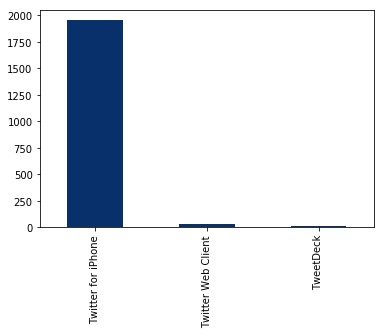

In [24]:
#local ou dispositivos onde foram feitos os tweets
tweets.source.value_counts().plot(kind='bar',colormap='Blues_r');

In [25]:
#As 10 raças mais reconhecidas pelo algoritmo com confiança acima de 95% 
predictions_result[(predictions_result.race) & (predictions_result.confidence > 0.95)].race_prediction.value_counts()[0:9]

pug                   20
Pembroke              19
Samoyed               19
golden_retriever      16
Pomeranian            13
Labrador_retriever     9
Chihuahua              9
French_bulldog         8
chow                   7
Name: race_prediction, dtype: int64

In [26]:
#considerando que Race = True significa que o algoritmo achou uma raça de cachoro, independente de qual.
p1 = predictions_result[predictions_result.prediction == 1].race.value_counts()
p2 = predictions_result[predictions_result.prediction == 2].race.value_counts()
p3 = predictions_result[predictions_result.prediction == 3].race.value_counts()

print(p1)
print(p2)
print(p3)

True     1477
False     517
Name: race, dtype: int64
True     1495
False     499
Name: race, dtype: int64
True     1446
False     548
Name: race, dtype: int64


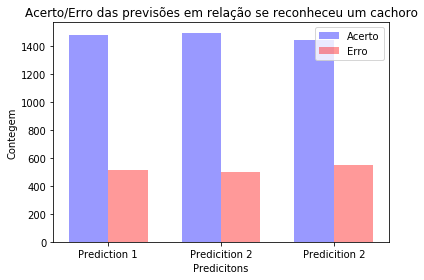

In [27]:
#Gerando o gráfico com acertos e erros do algoritmo
n_groups = 3

p_true = (p1[1],p2[1],p3[1])
p_false = (p1[0],p2[0],p3[0])

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, p_true, bar_width,
                alpha=opacity, color='b',
                label='Acerto')

rects2 = ax.bar(index + bar_width, p_false, bar_width,
                alpha=opacity, color='r',
                label='Erro')

ax.set_xlabel('Predicitons')
ax.set_ylabel('Contegem')
ax.set_title('Acerto/Erro das previsões em relação se reconheceu um cachoro')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Prediction 1', 'Predicition 2', 'Predicition 2'))
ax.legend()

fig.tight_layout()
plt.show()

In [28]:
# dos Tweets que tem classificação, pupper é a classificação mais recorrente
tweets.classification.value_counts()#.plot(kind='bar',colormap='ocean');

pupper           203
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: classification, dtype: int64

In [29]:
#assumindo que quanto maior a contagem de retweets e favoritos quer dizer maior popularidade
tweets.groupby(['classification'])[['retweet_count', 'favorits_count']].mean()

,retweet_count,favorits_count
classification,,
doggo,6926.888889,19052.682540
"doggo,floofer",3348.000000,16839.000000
"doggo,pupper",3993.666667,12470.888889
"doggo,puppo",18711.000000,46996.000000
floofer,4818.857143,12939.571429
pupper,2319.475248,7166.732673
puppo,6473.909091,22257.409091


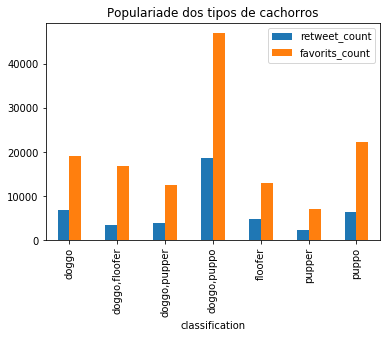

In [30]:
tweets.groupby(['classification'])[['retweet_count', 'favorits_count']].mean().plot(kind='bar',title="Populariade dos tipos de cachorros");